### Import Required Models and Helper Classes

In [25]:
# from IPython.core.display import HTML
# HTML("<script>Jupyter.notebook.kernel.restart()</script>")
%reload_ext autoreload
%autoreload 2
PROJECT_DIR = "/Users/raghav/envPython3/experiments/one_class_neural_networks/"
import sys,os
import numpy as np
sys.path.append(PROJECT_DIR)
from src.data.make_dataset import CreateDataSet
from src.models.fakeNoiseNN import FakeNoiseNN

## Create data for training and testing
createData = CreateDataSet()

## Signatures of the methods


### ===============================================================
get_USPS_TestingData: 
        returns-> 220 : 1s and 11: 7s
 
get_LHC_TestingData: 
        returns-> User can define Number of random Background(Normal) and Signal( Noise) images 
        
 get_USPS_TrainingData: 
        returns-> 220 : 1s

get_LHC_TrainingData: 
        returns-> User Defined: Number of  : Background Images
### ===============================================================

get_LHC_TestingData_With_Random_UniformNoise: 
        returns->  User can define number of random Background(Normal) , Signal( Noise) images  and URN uniform random noise samples to be returned

get_USPS_TestingData_With_Random_UniformNoise: 
        returns-> 220 : 1s and 220: URN( Uniform Random Noise)

get_FAKE_Noise_TrainingData
        returns-> 220 : URN

### ===============================================================


#### ===============================================================
### Experiment Setup


- for all methods, the test set is exactly the same (i.e., ones and sevens)

- for OCNN_FakeNoise, the training set does include uniform noise; what we do is treat these as negatives, and add a new term to the objective, which measures the hinge loss when making predictions for these fake points. This is almost exactly the same as the Keras FakeNN method, but instead of using cross-entropy loss, we use hinge-loss; and we additionally learn a parameter r, which controls the fraction of points predicted to be anomalous



In [21]:
## Obtaining the training and testing data
LHC_DATA_DIR = PROJECT_DIR+"/data/lhc/"
NUM_OF_NORMAL = 5000
NUM_OF_ANOMALIES= 50
[normal, anomalies] = createData.load_LHCDataset(LHC_DATA_DIR)


In [22]:
Xtrain_Pos,Xtrain_PosLabel = createData.get_LHC_TrainingData(normal,NUM_OF_NORMAL,NUM_OF_ANOMALIES)
[Xtest_Pos,label_Pos,Xtest_Neg,label_Neg]= createData.get_LHC_TestingData(normal,anomalies,NUM_OF_NORMAL,NUM_OF_ANOMALIES)



## FAKE_NOISE_KerasBinaryClassifier

In [33]:
%reload_ext autoreload
%autoreload 2
## Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_LHC_TrainingData(Xtrain_Pos)

## Create an Binary supervised classifier instance
NUM_EPOCHS = 10
clf_FakeNoiseNN =  FakeNoiseNN()
clf_FakeNoiseNN.fit(Xtrain_Pos,Xtrain_PosLabel,X_Neg,X_NegLabel,NUM_EPOCHS)  ## fit takes Normal and FakeNoise concatenates before training
res = clf_FakeNoiseNN.predict(Xtest_Pos,Xtest_Neg)
auc_FN_Supervised = res
print("="*35)
print("AUC:",res)
print("="*35)

Training the Keras Binary classifier.....
Removed Early stopping......
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 147us/step - loss: 0.0137 - acc: 0.0039 - val_loss: 1.0000e-07 - val_acc: 0.0000e+00
Epoch 2/10
8000/8000 [==============================] - 0s 31us/step - loss: 1.1201e-07 - acc: 0.0000e+00 - val_loss: 1.0000e-07 - val_acc: 0.0000e+00
Epoch 3/10
8000/8000 [==============================] - 0s 38us/step - loss: 1.1201e-07 - acc: 0.0000e+00 - val_loss: 1.0000e-07 - val_acc: 0.0000e+00
Epoch 4/10
8000/8000 [==============================] - 0s 31us/step - loss: 1.1201e-07 - acc: 0.0000e+00 - val_loss: 1.0000e-07 - val_acc: 0.0000e+00
Epoch 5/10
8000/8000 [==============================] - 0s 31us/step - loss: 1.1201e-07 - acc: 0.0000e+00 - val_loss: 1.0000e-07 - val_acc: 0.0000e+00
Epoch 6/10
8000/8000 [==============================] - 0s 35us/step - loss: 1.1201e-07 - acc: 0.0000e+00 - val_loss: 1.0000e-07 - va

/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


## SKLEARN OCSVM

Training the OCSVM classifier.....
AUC: 0.532516


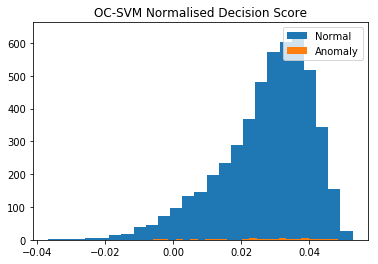

In [34]:
##create the classifier
from src.models.ocsvmSklearn import OCSVM
ocsvm = OCSVM()
nu= 0.04
kernel = 'rbf'
clf = ocsvm.fit(Xtrain_Pos,nu,kernel)
res = ocsvm.score(clf,Xtest_Pos,Xtest_Neg)
auc_OCSVM= res
print("="*35)
print("AUC:",res)
print("="*35)

### OC-NN


Training the OCNN classifier.....
Training OC-NN started for epochs:  10
Epoch = 1, r = -537.344160, Cost = 18837492.000000
Epoch = 2, r = -536.717744, Cost = 18797312.000000
Epoch = 3, r = -536.091272, Cost = 18757176.000000
Epoch = 4, r = -535.464976, Cost = 18717088.000000
Epoch = 5, r = -534.838616, Cost = 18677050.000000
Epoch = 6, r = -534.212380, Cost = 18637058.000000
Epoch = 7, r = -533.586265, Cost = 18597114.000000
Epoch = 8, r = -532.959746, Cost = 18557222.000000
Epoch = 9, r = -532.328892, Cost = 18517382.000000
Epoch = 10, r = -531.697917, Cost = 18477588.000000
AUC: 0.42841199999999996


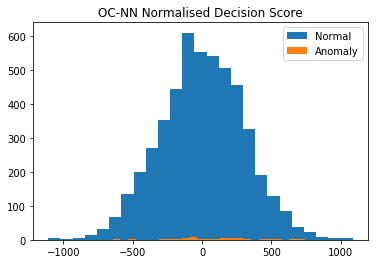

In [36]:
##create the classifier
## Instantiate the object and call the function
from src.models.ocnn import OCNN
ocnn = OCNN()

nu= 0.04
activation = 'sigmoid'
epochs = 10
ocnn.fit(Xtrain_Pos,nu,activation,epochs)
res = ocnn.score(Xtest_Pos,Xtest_Neg) 
auc_OCNN=res
print("="*35)
print("AUC:",res)
print("="*35)






### OC-NN WITH FAKENOISE

Training the OCNN classifier.....
Training OC-NN started for epochs:  10
Epoch = 1, Cost = 18837220.000000
Epoch = 2, Cost = 18797040.000000
Epoch = 3, Cost = 18756904.000000
Epoch = 4, Cost = 18716816.000000
Epoch = 5, Cost = 18676778.000000
Epoch = 6, Cost = 18636786.000000
Epoch = 7, Cost = 18596844.000000
Epoch = 8, Cost = 18556952.000000
Epoch = 9, Cost = 18517114.000000
Epoch = 10, Cost = 18477322.000000
Saving ON-NN Trained Model weights @ ../models/ocnn/
(5000, 1369)
Loading ON-NN Trained Model weights @  ../models/ocnn/
AUC: 0.487308


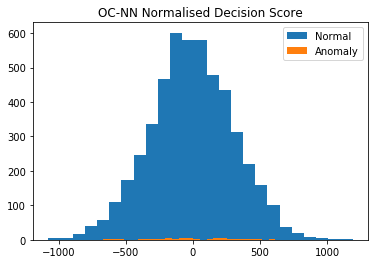

In [38]:
%reload_ext autoreload
%autoreload 2
## Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_LHC_TrainingData(Xtrain_Pos)

##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.04
activation = 'sigmoid'
epochs = 10
ocnn.fit(Xtrain_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)



### Experiments by changing the loss functions

## Experiment-1 with (1/nu) term
term5 = 1/nu * tf.reduce_sum( tf.maximum(0.0, 1.0 + nnScore(Xneg, w, V, g,bias1,bias2)))


## Experiment-2 with (1/nu) and plus r term
term5 = 1/nu * tf.reduce_sum( tf.maximum(0.0, r + nnScore(Xneg, w, V, g,bias1,bias2)))

## Experiment 1

In [ ]:
## Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_LHC_TrainingData(Xtrain_Pos)


##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(Xtrain_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)


 ## With r = 1

Training the OCNN classifier.....
Training OC-NN started for epochs:  10
Epoch = 1, Cost = 18837218.000000
Epoch = 2, Cost = 18797038.000000
Epoch = 3, Cost = 18756902.000000
Epoch = 4, Cost = 18716814.000000
Epoch = 5, Cost = 18676776.000000
Epoch = 6, Cost = 18636784.000000
Epoch = 7, Cost = 18596842.000000
Epoch = 8, Cost = 18556950.000000
Epoch = 9, Cost = 18517112.000000
Epoch = 10, Cost = 18477320.000000
Saving ON-NN Trained Model weights @ ../models/ocnn/
(5000, 1369)
Loading ON-NN Trained Model weights @  ../models/ocnn/
AUC: 0.487308


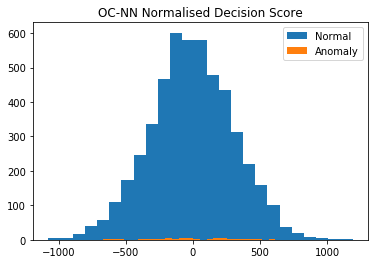

In [40]:
#### Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_LHC_TrainingData(Xtrain_Pos)


##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.01
activation = 'sigmoid'
epochs = 10
ocnn.fit(Xtrain_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
auc_FN_OCNN_R_1= res
print("="*35)
print("AUC:",res)
print("="*35)

Text(0.5,1,'AUC Comparision for LHC Dataset ')

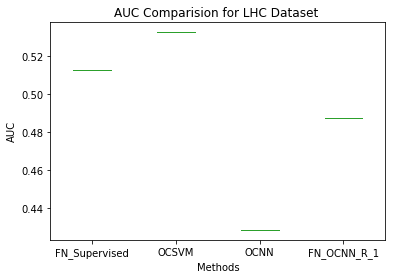

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

auc = np.zeros((1,4))
auc[0][0] = auc_FN_Supervised
auc[0][1] = auc_OCSVM
auc[0][2] = auc_OCNN
auc[0][3] = auc_FN_OCNN_R_1



df = pd.DataFrame(auc,columns=['FN_Supervised','OCSVM','OCNN','FN_OCNN_R_1'])
boxplot = df.boxplot(column=['FN_Supervised', 'OCSVM', 'OCNN','FN_OCNN_R_1'],grid=False)
plt.ylabel('AUC')
plt.xlabel('Methods')
plt.title('AUC Comparision for LHC Dataset ')
